In [2]:
# İsim  : Süleyman Arif Ersoy
# NO : 200205050
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np


In [3]:
class GenetikAlgoritma:
    def __init__(self,gen_size,populasyon_size,iterasyon,crossover_orani,mutasyon_orani):
        self.gen_size = gen_size
        self.populasyon_size = populasyon_size
        self.iterasyon = iterasyon
        self.crossover_orani = crossover_orani
        self.mutasyon_orani=mutasyon_orani

    def kromozon_olustur(self):
        return [random.random() for i in range(0,self.gen_size)]

    def populasyon_olustur(self):
        return [self.kromozon_olustur() for i in range(0,self.populasyon_size)]

    def olasilik_hesapla(self,fitness_degeri):
        P=[]
        total = sum(fitness_degeri)
        P = [deger/total for deger in fitness_degeri]
        return P

    def crossover(self,kromozon1,kromozon2):
        yeni_kromozon1=[]
        yeni_kromozon2=[]

        r = random.randint(0,self.gen_size-1)
        yeni_kromozon1[:r]=kromozon2[:r]
        yeni_kromozon1[r:]=kromozon1[r:]

        yeni_kromozon2[:r]=kromozon1[:r]
        yeni_kromozon2[r:]=kromozon2[r:]
        return yeni_kromozon1,yeni_kromozon2

    def mutasyon(self,kromozon):
        temp = []
        temp = kromozon[:]
        gen = random.randint(-2,2) # mutasyon yapılcak olan genin değeri
        index = random.randint(0,self.gen_size-1) # genlerden biri seçilecek
        temp[index]= gen
        return temp

    def genetik_fonksiyon_degerleri(self,cr,x):
        sonuc = [np.power(x[i][0], 3) * cr[0] + np.power(x[i][0], 2) * cr[1] + x[i][0] * cr[2] + cr[3]  for i in range(len(x))]
        return sonuc

    def fonksiyon(self,cr):
        return f"{cr[0]}*x^3 + ({cr[1]})*x^2 + ({cr[2]})*x + ({cr[3]})"



    def fitness(self,cr,x,y): #cr=> oluşturduğumuz kromozonların genleri ,  x,y => veri setindeki x değerimiz ve y değerimiz
        sonuc = self.ortalama_kare_hatasi(cr=cr,y=y,x=x)
        return 1/(1+sonuc)

    def genetik_fonksiyon(self,cr,x):
        return np.power(x, 3) * cr[0] + np.power(x, 2) * cr[1] + x * cr[2] + cr[3]

    # çizmemiz gereken en optimum çizgiyi çizmek için tahmin edilen değer ile gerçek değer arasındaki hata en az olması gerekir
    def ortalama_kare_hatasi(self,cr,y,x):
        orneklem_sayisi=len(x)
        sonuc = []
        k = 1/2*orneklem_sayisi
        sonuc =[np.power(y[i][0]-self.genetik_fonksiyon(cr,x[i]),2) for i in range(0,veri_sayisi)]
        sonuc = np.sum(sonuc)
        return k*sonuc

In [5]:
df = pd.read_csv("data_file.csv")
veri_sayisi = df.shape[0]
X = df.iloc[:,:-1].values # ndarray
Y = df.iloc[:,-1:].values # ndarray

genetik = GenetikAlgoritma(iterasyon=100,populasyon_size=10,gen_size=4,crossover_orani=0.75,mutasyon_orani=0.1)

populasyon =genetik.populasyon_olustur() # random bir populasyon olusturalım
fitness_degerleri = []


In [6]:
random.seed(61)
epok =0
while(epok < genetik.iterasyon):
    for kromozon in populasyon :
        fitness_degerleri.append(genetik.fitness(cr=kromozon,x=X,y=Y))

    # olasılık işlemleri
    P = genetik.olasilik_hesapla(fitness_degeri=fitness_degerleri)
    C = np.cumsum(P) # Kümülatif olasılık

    # rulet tekeri ile rastgele seçim yapma
    rulet_indexleri = []
    for i in range(0,len(C)):
        r= random.random()
        for j in range(0,len(C)):
            if C[j]>r:
                rulet_indexleri.append(j)
                break

    # crossover işlemine girecek sağlıklı kromozonların indexlerini seçme
    crossover_indexleri = []
    k = 0
    while(k<genetik.populasyon_size):
        r=random.random()
        if(r<genetik.crossover_orani):
            if(rulet_indexleri[k] not in crossover_indexleri):
                crossover_indexleri.append(rulet_indexleri[k])
        k=k+1
    # crossover işlemini gerçekleştirme
    if (len(crossover_indexleri)>1):
        for i in range(0,len(crossover_indexleri)):
            for j in range(i+1,len(crossover_indexleri)):
                if crossover_indexleri[i] < len(populasyon) and crossover_indexleri[j] < len(populasyon):
                    yeni_kromozon1,yeni_kromozon2 = genetik.crossover(populasyon[crossover_indexleri[i]],populasyon[crossover_indexleri[j]])
                    populasyon.append(yeni_kromozon1)
                    populasyon.append(yeni_kromozon2)
                    fitness_degerleri.append(genetik.fitness(cr=kromozon,x=X,y=Y))
                    fitness_degerleri.append(genetik.fitness(cr=kromozon,x=X,y=Y))
    # Mutasyon işlemi
    for _ in range(40):
            mutasyonlu_kromozon = genetik.mutasyon(populasyon[random.randint(0,genetik.populasyon_size-1)])
            populasyon.append(mutasyonlu_kromozon)
            fitness_degerleri.append(genetik.fitness(cr=kromozon,x=X,y=Y))

    zip_list=zip(fitness_degerleri,populasyon)
    sort_list = sorted(zip_list,reverse=True)
    # en iyi kromozonları populasyon büyüklüğüne göre elimizde tutma (elitizim)
    p=len(populasyon)
    while (p>genetik.populasyon_size):
        sort_list.pop()
        p=p-1
    populasyon = []
    fitness_degerleri = []

    for i , j in list(sort_list):
        populasyon.append(j)
        fitness_degerleri.append(i)

    epok= epok + 1

Fonksiyon : 1*x^3 + (2)*x^2 + (0.6546337505679862)*x + (2) ---------->>>>>--->>>>>>>-->>>>>>--- hata degeri : 4249531.89226133


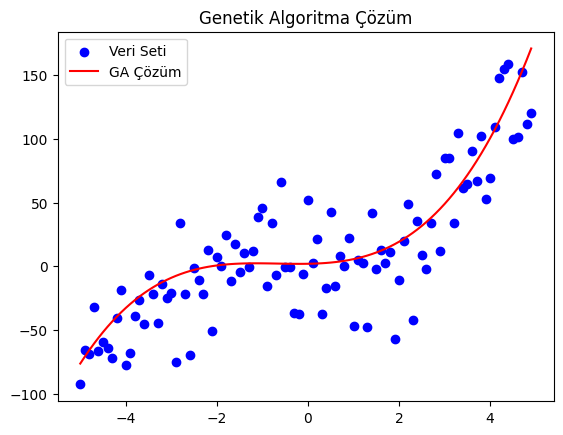

In [10]:
en_iyi_kromozon = populasyon[genetik.populasyon_size-1]
print(f"Fonksiyon : {genetik.fonksiyon(en_iyi_kromozon)} ---------->>>>>--->>>>>>>-->>>>>>--- hata degeri : {genetik.ortalama_kare_hatasi(cr=en_iyi_kromozon,y=Y,x=X)}")

tahmini_y_degerleri = genetik.genetik_fonksiyon_degerleri(cr=en_iyi_kromozon,x=X)


plt.scatter(X,Y,color="blue",label="Veri Seti")
plt.title("Genetik Algoritma Çözüm")
plt.plot(X,tahmini_y_degerleri,color="red",label= "GA Çözüm")
plt.legend()
plt.show()